In [46]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
# Importing the Boston Housing dataset
# from sklearn.datasets import load_boston
# boston = load_boston()
# !pip install kaggle
# import kaggle

# kaggle.api.authenticate()

# kaggle.api.dataset_download_files('housing.csv', path='C:/Users/j0a02eu/Desktop/2023/BostonHousingPrices', unzip=True)

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [48]:
#data is csv file without headers (need to add them)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("housing.csv", header=None,  delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [49]:
# data.to_excel('boston.xlsx')

In [50]:
#some size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [51]:
data.shape

(506, 14)

Some prelim analysis

In [52]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [53]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [54]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [55]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


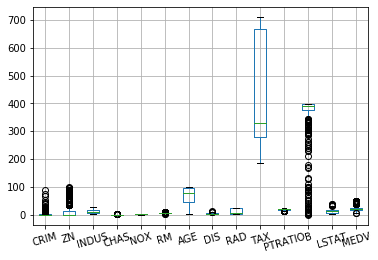

In [56]:
data.boxplot(column_names, rot=16)

In [57]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

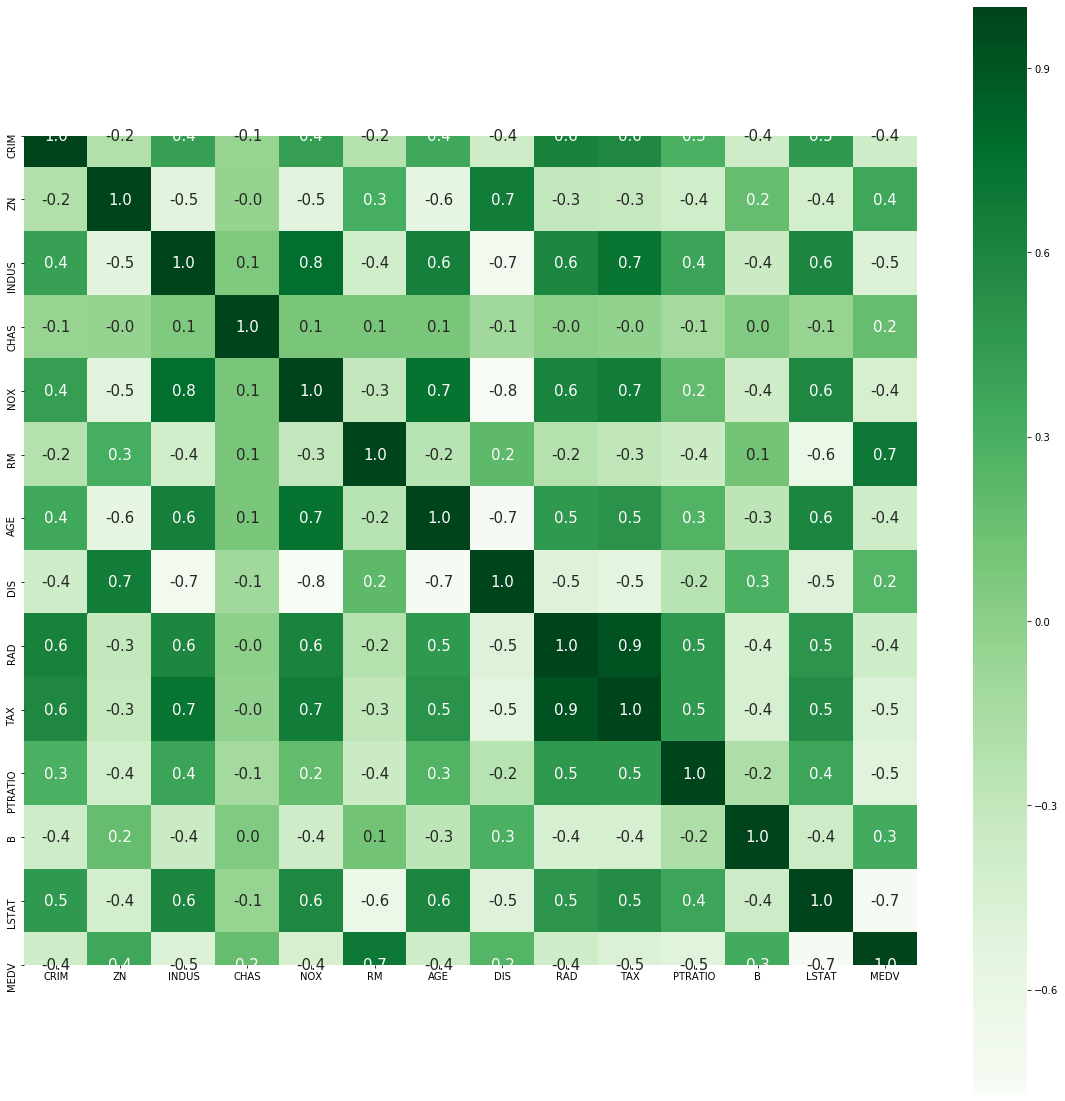

In [58]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')


# Plotting the heatmap of correlation between features
# plt.figure(figsize=(20,20))
# sns.heatmap(data.select_dtypes(include=['int','float']).corr(),annot=True,center = 2)
# plt.show()

In [59]:
#split target variable to the rest
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [25]:
# X[0,0]
import xgboost
# from xgboost import XGBRegressor
print(xgboost.__version__)

0.90


In [60]:
# Splitting to training and testing data
import pickle
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [27]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn import svm
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics
# from sklearn.metrics import accuracy_score


X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
84,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247.0,18.5,396.90,9.62
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334.0,22.0,382.80,8.05
221,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307.0,17.4,395.24,21.46
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34
267,0.57834,20.0,3.97,0,0.575,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666.0,20.2,396.90,30.81
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329.0,12.6,354.31,8.61
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,24,666.0,20.2,396.90,22.88
174,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296.0,16.6,393.23,9.64


Linear regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

pickle.dump(lm,open('lm.pkl','wb'))

In [ ]:
# Value of y intercept
lm.intercept_

36.35704137659468

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.0556777
2,INDUS,-0.00883428
3,CHAS,4.69345
4,NOX,-14.4358
5,RM,3.28008
6,AGE,-0.00344778
7,DIS,-1.55214
8,RAD,0.32625
9,TAX,-0.0140666


In [ ]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [ ]:
# Model Evaluation

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


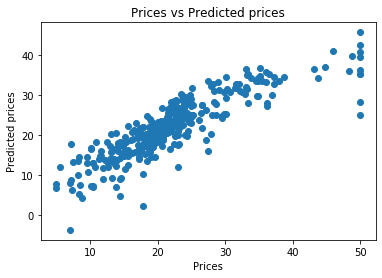

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

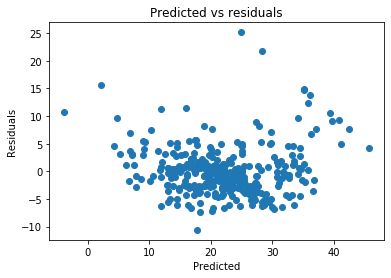

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409184
Adjusted R^2: 0.6850685326005701
MAE: 3.859005592370744
MSE: 30.053993307124255
RMSE: 5.482152251362986


Random Forest Regressor

In [63]:
X_train.values

array([[5.05900e-02, 0.00000e+00, 4.49000e+00, ..., 1.85000e+01,
        3.96900e+02, 9.62000e+00],
       [4.30100e-02, 8.00000e+01, 1.91000e+00, ..., 2.20000e+01,
        3.82800e+02, 8.05000e+00],
       [4.07710e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.95240e+02, 2.14600e+01],
       ...,
       [9.39063e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.28800e+01],
       [8.44700e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.93230e+02, 9.64000e+00],
       [9.29900e-02, 0.00000e+00, 2.56500e+01, ..., 1.91000e+01,
        3.78090e+02, 1.79300e+01]])

In [64]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train.values, y_train)
pickle.dump(reg,open('rf.pkl','wb'))

In [66]:
# Model prediction on train data
y_pred = reg.predict(X_train.values)

In [67]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9768668307923816
Adjusted R^2: 0.975982327263855
MAE: 0.87592372881356
MSE: 1.741252838983051
RMSE: 1.3195653977666477


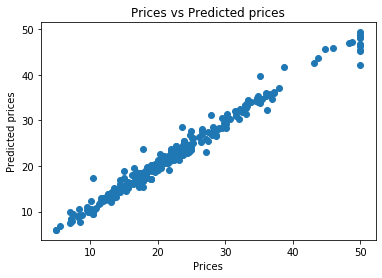

In [68]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

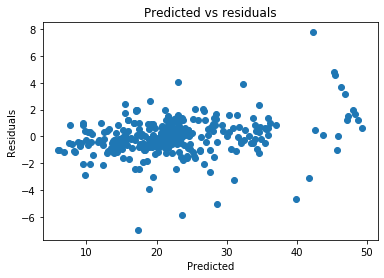

In [69]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [70]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test.values)

In [71]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.818477917075428
Adjusted R^2: 0.8013780107129684
MAE: 2.5599539473684207
MSE: 18.954549019736852
RMSE: 4.353682236881426


XGboost regressor

In [ ]:
!pip 

In [31]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

pickle.dump(reg,open('xgb.pkl','wb'))

[16:13:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [33]:
# Model Evaluation

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9703652512761263
Adjusted R^2: 0.9692321579425663
MAE: 1.1372202838208043
MSE: 2.230632123289034
RMSE: 1.4935300878419002


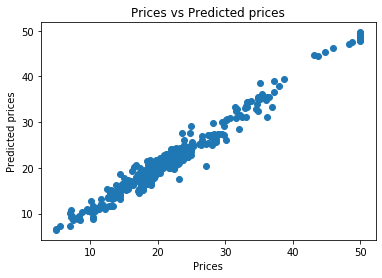

In [34]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

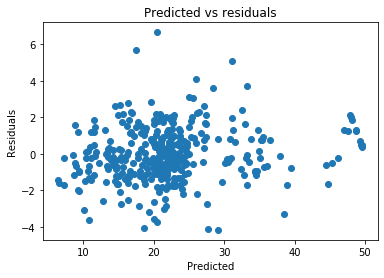

In [35]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [36]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [37]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8494894736313225
Adjusted R^2: 0.8353109457849979
MAE: 2.4509708843733136
MSE: 15.716320042597493
RMSE: 3.9643814199188117


SVM Regressor

In [ ]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pickle.dump(sc,open('sc.pkl','wb'))

In [ ]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [ ]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6419097248941195
Adjusted R^2: 0.628218037904777
MAE: 2.9361501059460284
MSE: 26.953752101332935
RMSE: 5.191700309275655


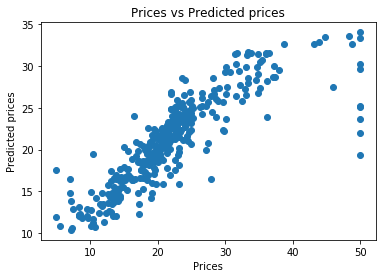

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

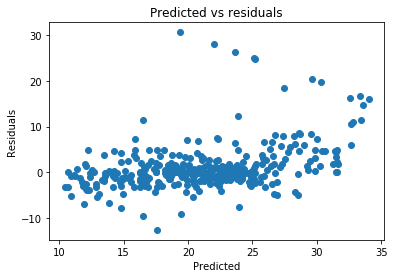

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [42]:
# f=[1,2,3]
# [np.array(f)]

list

In [ ]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5900158460478174
Adjusted R^2: 0.5513941503856553
MAE: 3.7561453553021673
MSE: 42.81057499010247
RMSE: 6.542979060802691


Evaluation and comparision of all the models

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,84.948947
1,Random Forest,83.368315
0,Linear Regression,71.218184
3,Support Vector Machines,59.001585


Looks like XGBoost is best model
#Pickling The Model file For Deployment

In [ ]:
# import pickle

# pickle.dump(regression,open('regmodel.pkl','wb'))

# pickled_model=pickle.load(open('regmodel.pkl','rb'))

# ## Prediction
# pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

# pickle.dump(scaler,open('scaling.pkl','wb'))


# load model from file
loaded_model = pickle.load(open("xgb.pkl", "rb"))
# make predictions for test data
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
y_pred = loaded_model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.r2_score(y_test, y_test_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[18:38:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 84.95%


In [ ]:
y_pred

array([16.557446, 23.924366, 20.01147 , 17.185726, 46.930664, 23.763788,
       34.9515  , 18.784836, 13.498174, 18.422983, 29.282124, 23.649532,
       22.08411 , 24.74782 , 21.252974, 11.868654, 21.254227, 11.185419,
       10.914793, 16.342815,  7.399475, 17.558815, 19.115173, 20.341505,
       19.165623, 20.446579, 16.817892, 16.251396, 19.02401 , 17.646078,
       12.908319, 22.84473 , 30.841984, 22.320522, 16.079094, 13.131642,
       31.76732 , 45.51235 , 22.268328, 23.403122, 44.15297 , 31.371946,
       14.339232, 27.093636, 29.45704 , 19.727743, 47.518513, 18.275347,
       19.607313, 22.179607, 30.909986, 22.499214, 12.325766, 26.66637 ,
       16.181038, 21.183767, 23.47778 , 31.549095, 20.243944, 30.8932  ,
       16.651373, 19.550146, 27.158188, 18.608498, 46.871227, 25.042295,
       32.804817,  8.852583, 17.87566 , 21.075508, 22.604055, 21.73987 ,
       23.110357, 26.1003  , 16.697563, 31.818068, 17.29376 , 24.070421,
       12.636693, 18.870008, 20.91859 , 17.70684 , 

In [12]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)


y_pred = reg.predict(X_train)

[15:33:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [45]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
84,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247.0,18.5,396.90,9.62
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334.0,22.0,382.80,8.05
221,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307.0,17.4,395.24,21.46
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34
267,0.57834,20.0,3.97,0,0.575,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666.0,20.2,396.90,30.81
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329.0,12.6,354.31,8.61
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,24,666.0,20.2,396.90,22.88
174,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296.0,16.6,393.23,9.64


In [75]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train.values, y_train)
pickle.dump(reg,open('rf.pkl','wb'))
model=pickle.load(open('rf.pkl','rb'))
g=model.predict([np.array([0.05059,0.0,4.49,0,0.449, 
              6.389,48.0,4.7794,3,247.0,18.5,396.90,9.62])])
    
    
    
    
#     pd.DataFrame({'CRIM':[0.05059],
#              'ZN':[0.0],
#             'INDUS':[4.49],
#              'CHAS':[0],
#              'NOX':[0.449], 
#               'RM':[6.389],
#               'AGE':[48.0],
#                'DIS':[4.7794],
#                'RAD':[3],
#                 'TAX':[247.0],
#                'PTRATIO':[18.5],
#                'B':[396.90],
#                 'LSTAT':[9.62]}))
g[0]

23.236000000000022

In [43]:
reg.predict([np.array([0.05059
            ,
             0.0,
            4.49,
             0,
             0.449, 
              6.389,
              48.0,
               4.7794,
               3,
                247.0,
               18.5,
               396.90,
                9.62]
                )])

ValueError: feature_names mismatch: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12']
expected PTRATIO, RM, INDUS, NOX, CHAS, ZN, B, LSTAT, DIS, AGE, TAX, RAD, CRIM in input data
training data did not have the following fields: f7, f1, f4, f12, f5, f0, f10, f8, f2, f11, f9, f6, f3

In [22]:
df = {'Name' : ['Simon', 'Marsh', 'Gaurav', 
                 'Alex', 'Selena'],  
        'Maths' : [8, 5, 6, 9, 7],  
        'Science' : [7, 9, 5, 4, 7], 
        'English' : [7, 4, 7, 6, 8]} 
df = pd.DataFrame(df)
print("Original DataFrame")
display(df)
  
print("Value of row 3 (Alex)")
display(df.iloc[3])

Original DataFrame


,Name,Maths,Science,English
0,Simon,8,7,7
1,Marsh,5,9,4
2,Gaurav,6,5,7
3,Alex,9,4,6
4,Selena,7,7,8


Value of row 3 (Alex)


Name       Alex
Maths         9
Science       4
English       6
Name: 3, dtype: object

In [23]:
df.iloc[3]

Name       Alex
Maths         9
Science       4
English       6
Name: 3, dtype: object

In [24]:
np.array(
            list(df.values())
        ).reshape(1,-1)

TypeError: 'numpy.ndarray' object is not callable

In [39]:
# np.arange(6)
np.arange(8).reshape((4,-1))
# np.arange(6).reshape(1,-1)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])